In [ ]:
import pandas as pd

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
dia_130 = fetch_ucirepo(id=296)
# metadata
print("A metadata Description")
print(dia_130.metadata)

print(dia_130.shape)

#variable information
print(dia_130.variables)

A metadata Description
{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control.

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
# data (as pandas dataframes)
X_130 = dia_130.data.features
y_130 = dia_130.data.targets

print("DataFrame")
pandas_df = pd.DataFrame(X_130, columns=dia_130.feature_names)

DataFrame


In [ ]:
v1_130 = pandas_df.isnull().sum()
print(v1_130)

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [ ]:
pandas_df.drop(['weight','payer_code','medical_specialty'], axis = 1, inplace = True)
pandas_df = pandas_df.dropna(subset=['race','diag_1', 'diag_2', 'diag_3'])
y_130_aligned = y_130.loc[pandas_df.index]
print(pandas_df.shape)
print("Features and number of NaN values per feature/column")
v1_130 = pandas_df.isnull().sum()
print(v1_130)
print(y_130_aligned)
print(y_130_aligned.shape)

(98053, 44)
Features and number of NaN values per feature/column
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               92845
A1Cresult                   81860
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide      

In [ ]:
print(pandas_df.head())
print(pandas_df.dtypes)

              race  gender      age  admission_type_id  \
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   
5        Caucasian    Male  [50-60)                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   
5                         1                    2                 3   

   num_lab_procedures  num_procedures  num_medications  ...  examide  \
1                  59               0               18  ...       No   
2                  11               5               13  ...       No   
3             

In [ ]:
pandas_df_tar = pd.DataFrame(y_130_aligned, columns=dia_130.target_names)
print(pandas_df_tar.shape)
print(pandas_df_tar.isnull().sum())

(98053, 1)
readmitted    0
dtype: int64


Map Diagnosis code to categories

In [ ]:
# Step 1: Read the CSV and create the mapping dictionary
icd_9_codes_url = 'https://raw.githubusercontent.com/brotaur/MLdiabetes/main/Converstion%20table2.csv'
icd_9_codes_df = pd.read_csv(icd_9_codes_url, encoding='ISO-8859-1')
icd_9_code_mapping = icd_9_codes_df.set_index('Diag Code')['Diag Category'].to_dict()

# Step 2: Apply the mapping to your DataFrame
icd_9_columns = ['diag_1', 'diag_2', 'diag_3']

for column in icd_9_columns:
    pandas_df[column] = pandas_df[column].map(icd_9_code_mapping)

# At this point, diag_1, diag_2, and diag_3 in your DataFrame have been replaced
# with their corresponding diagnostic categories from the CSV
print(pandas_df)


                   race  gender      age  admission_type_id  \
1             Caucasian  Female  [10-20)                  1   
2       AfricanAmerican  Female  [20-30)                  1   
3             Caucasian    Male  [30-40)                  1   
4             Caucasian    Male  [40-50)                  1   
5             Caucasian    Male  [50-60)                  2   
...                 ...     ...      ...                ...   
101761  AfricanAmerican    Male  [70-80)                  1   
101762  AfricanAmerican  Female  [80-90)                  1   
101763        Caucasian    Male  [70-80)                  1   
101764        Caucasian  Female  [80-90)                  2   
101765        Caucasian    Male  [70-80)                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              1                    7                 3   
2                              1                    7                 2   
3                 

In [ ]:
# Step 2: Inspect unique values after mapping
print("Unique categories in 'diag_1' after mapping:", pandas_df['diag_1'].unique()[:10])

# Step 3: Sample rows check
print("Sample rows from the DataFrame:")
print(pandas_df[['diag_1', 'diag_2', 'diag_3']].sample(5))

# Step 4: Check for unmapped codes (assuming all codes should be mapped)
unmapped_check = pandas_df[['diag_1', 'diag_2', 'diag_3']].isnull().any()
print("Columns with unmapped codes:", unmapped_check)


Unique categories in 'diag_1' after mapping: ['Other metabolic and immunity disorders'
 'Complications Mainly Related To Pregnancy'
 'Intestinal infectious diseases'
 'Malignant neoplasm of other and unspecified sites'
 'Ischemic Heart Disease' 'Other Forms Of Heart Disease'
 'Chronic Rheumatic Heart Disease' 'Cerebrovascular Disease'
 'Diabetes mellitus'
 'Malignant neoplasm of digestive organs and peritoneum']
Sample rows from the DataFrame:
                                    diag_1  \
25762                             Symptoms   
101453  Other Diseases Of Digestive System   
62097                             Symptoms   
80575                         Dorsopathies   
80818     Other Diseases Of Urinary System   

                                                   diag_2  \
25762   Chronic Obstructive Pulmonary Disease And Alli...   
101453  Complications Of Surgical And Medical Care, No...   
62097   Chronic Obstructive Pulmonary Disease And Alli...   
80575                      Rheu

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize one LabelEncoder per column to keep track of the mappings
label_encoder_diag_1 = LabelEncoder()
label_encoder_diag_2 = LabelEncoder()
label_encoder_diag_3 = LabelEncoder()

# Apply Label Encoding for 'diag_1', 'diag_2', 'diag_3'
pandas_df['diag_1_encoded'] = label_encoder_diag_1.fit_transform(pandas_df['diag_1'])
pandas_df['diag_2_encoded'] = label_encoder_diag_2.fit_transform(pandas_df['diag_2'])
pandas_df['diag_3_encoded'] = label_encoder_diag_3.fit_transform(pandas_df['diag_3'])

# Display the first few rows to verify the encoded columns
print(pandas_df[['diag_1', 'diag_1_encoded', 'diag_2', 'diag_2_encoded', 'diag_3', 'diag_3_encoded']].head())
print(pandas_df)


                                              diag_1  diag_1_encoded  \
1             Other metabolic and immunity disorders              98   
2          Complications Mainly Related To Pregnancy              15   
3                     Intestinal infectious diseases              57   
4  Malignant neoplasm of other and unspecified sites              66   
5                             Ischemic Heart Disease              59   

                                              diag_2  diag_2_encoded  \
1                                  Diabetes mellitus              28   
2                                  Diabetes mellitus              28   
3                                  Diabetes mellitus              28   
4  Malignant neoplasm of digestive organs and per...              74   
5                             Ischemic Heart Disease              69   

                                              diag_3  diag_3_encoded  
1                        Disorders of adrenal glands           

In [ ]:
label_encoder_race = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_change = LabelEncoder()
label_encoder_diabetesMed = LabelEncoder()

# Apply Label Encoding for race, gender, change, and diabetesMed
pandas_df['race'] = label_encoder_diag_1.fit_transform(pandas_df['race'])
pandas_df['gender'] = label_encoder_diag_2.fit_transform(pandas_df['gender'])
pandas_df['change'] = label_encoder_diag_3.fit_transform(pandas_df['change'])
pandas_df['diabetesMed'] = label_encoder_diag_1.fit_transform(pandas_df['diabetesMed'])


print(pandas_df[['race', 'gender', 'change','diabetesMed']].head())

   race  gender  change  diabetesMed
1     2       0       0            1
2     0       0       1            1
3     2       1       0            1
4     2       1       0            1
5     2       1       1            1


In [ ]:
pandas_df.dtypes

race                         int64
gender                       int64
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

In [ ]:
pandas_df['A1Cresult'].fillna('None', inplace=True)

pandas_df['max_glu_serum'].fillna('None', inplace=True)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Mapping
age_mapping = {'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7,'[80-90)':8, '[90-100)':9}
max_glu_serum_mapping = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
A1Cresult_mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}
metformin_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
repaglinide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
nateglinide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
chlorpropamide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
glimepiride_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
acetohexamide_mapping = {'No':0, 'Steady': 1}
glipizide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
glyburide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
tolbutamide_mapping = {'No':0, 'Steady': 1}
pioglitazone_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
rosiglitazone_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
acarbose_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
miglitol_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
troglitazone_mapping = {'No':0, 'Steady': 1}
tolazamide_mapping = {'No':0, 'Steady': 1, 'Up':2}
examide_mapping = {'No':0}
citoglipton_mapping = {"No": 0}
insulin_mapping = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}
glyburide_metformin_mapping = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}
glipizide_metformin_mapping = {"No": 0, "Steady": 1}
glimepiride_pioglitazone_mapping = {"No": 0, "Steady": 1}
metformin_rosiglitazone_mapping = {'No':0}
metformin_pioglitazone_mapping = {'No':0, 'Steady': 1}

# Applying mapping
pandas_df['age'] = pandas_df['age'].map(age_mapping)
pandas_df['max_glu_serum'] = pandas_df['max_glu_serum'].map(max_glu_serum_mapping)
pandas_df['A1Cresult'] = pandas_df['A1Cresult'].map(A1Cresult_mapping)
pandas_df['metformin'] = pandas_df['metformin'].map(metformin_mapping)
pandas_df['repaglinide'] = pandas_df['repaglinide'].map(repaglinide_mapping)
pandas_df['nateglinide'] = pandas_df['nateglinide'].map(nateglinide_mapping)
pandas_df['chlorpropamide'] = pandas_df['chlorpropamide'].map(chlorpropamide_mapping)
pandas_df['glimepiride'] = pandas_df['glimepiride'].map(glimepiride_mapping)
pandas_df['acetohexamide'] = pandas_df['acetohexamide'].map(acetohexamide_mapping)
pandas_df['glipizide'] = pandas_df['glipizide'].map(glipizide_mapping)
pandas_df['glyburide'] = pandas_df['glyburide'].map(glyburide_mapping)
pandas_df['tolbutamide'] = pandas_df['tolbutamide'].map(tolbutamide_mapping)
pandas_df['pioglitazone'] = pandas_df['pioglitazone'].map(pioglitazone_mapping)
pandas_df['rosiglitazone'] = pandas_df['rosiglitazone'].map(rosiglitazone_mapping)
pandas_df['acarbose'] = pandas_df['acarbose'].map(acarbose_mapping)
pandas_df['miglitol'] = pandas_df['miglitol'].map(miglitol_mapping)
pandas_df['troglitazone'] = pandas_df['troglitazone'].map(troglitazone_mapping)
pandas_df['tolazamide'] = pandas_df['tolazamide'].map(tolazamide_mapping)
pandas_df['examide'] = pandas_df['examide'].map(examide_mapping)
pandas_df['citoglipton'] = pandas_df['citoglipton'].map(citoglipton_mapping)
pandas_df['insulin'] = pandas_df['insulin'].map(insulin_mapping)
pandas_df['glyburide-metformin'] = pandas_df['glyburide-metformin'].map(glyburide_metformin_mapping)
pandas_df['glipizide-metformin'] = pandas_df['glipizide-metformin'].map(glipizide_metformin_mapping)
pandas_df['glimepiride-pioglitazone'] = pandas_df['glimepiride-pioglitazone'].map(glimepiride_pioglitazone_mapping)
pandas_df['metformin-rosiglitazone'] = pandas_df['metformin-rosiglitazone'].map(metformin_rosiglitazone_mapping)
pandas_df['metformin-pioglitazone'] = pandas_df['metformin-pioglitazone'].map(metformin_pioglitazone_mapping)

In [ ]:
pandas_df.dtypes

race                         int64
gender                       int64
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone        

In [ ]:
pandas_df_numeric = pandas_df.drop(columns=['diag_1', 'diag_2', 'diag_3'])
pandas_df_numeric.dtypes

race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone               int64
acarbose                    int64
miglitol                    int64
troglitazone  

In [ ]:
 pandas_df_numeric.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

In [ ]:
pandas_df_numeric.shape

(98053, 44)

In [ ]:
pandas_df_numeric

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_1_encoded,diag_2_encoded,diag_3_encoded
1,2,0,1,1,1,7,3,59,0,18,...,0,0,0,0,0,0,1,98,28,42
2,0,0,2,1,1,7,2,11,5,13,...,0,0,0,0,0,1,1,15,28,119
3,2,1,3,1,1,7,2,44,1,16,...,0,0,0,0,0,0,1,57,28,59
4,2,1,4,1,1,7,1,51,0,8,...,0,0,0,0,0,0,1,66,74,29
5,2,1,5,2,1,2,3,31,6,16,...,0,0,0,0,0,1,1,59,69,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,1,3,7,3,51,0,16,...,0,0,0,0,0,0,1,22,130,36
101762,0,0,8,1,4,5,5,33,3,18,...,0,0,0,0,0,1,1,85,116,137
101763,2,1,7,1,1,7,1,53,0,9,...,0,0,0,0,0,0,1,83,105,130
101764,2,0,8,2,3,7,10,45,2,21,...,0,0,0,0,0,0,1,17,8,24


In [ ]:
pandas_df_tar

,readmitted
1,>30
2,NO
3,NO
4,NO
5,>30
...,...
101761,>30
101762,NO
101763,NO
101764,NO


Readmitted

Text(0.5, 0, 'Count')

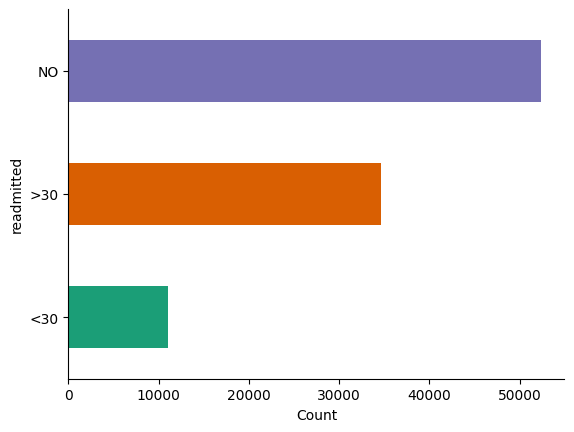

In [ ]:
# @title readmitted

from matplotlib import pyplot as plt
import seaborn as sns
pandas_df_tar.groupby('readmitted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Count')

In [ ]:
# prompt: Using dataframe pandas_df_tar: replace the categories >30 and NO by 0, and <30 by 1 and save this df as pandas_df_tar_binom

pandas_df_tar_binom = pandas_df_tar.copy()
pandas_df_tar_binom['readmitted'] = pandas_df_tar_binom['readmitted'].replace({'>30': 0, 'NO': 0, '<30': 1})
pandas_df_tar_binom['readmitted'].value_counts()

readmitted
0    86987
1    11066
Name: count, dtype: int64

Text(0.5, 0, 'Count')

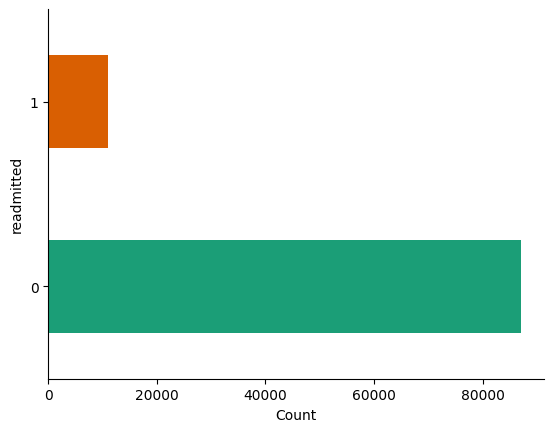

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
pandas_df_tar_binom.groupby('readmitted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Count')

The below code is for looking at descriptions of the data

In [ ]:
pandas_df_numeric.describe()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_1_encoded,diag_2_encoded,diag_3_encoded
count,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,...,98053.000000,98053.000000,98053.000000,98053.0,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000
mean,1.659011,0.461189,6.126034,2.025813,3.753368,5.776692,4.421976,43.148073,1.350749,16.119650,...,0.006945,0.000133,0.000010,0.0,0.000010,0.538219,0.768472,62.143065,75.532926,72.977502
std,0.860882,0.498514,1.559075,1.450117,5.309392,4.071640,2.993074,19.712033,1.708506,8.108476,...,0.084871,0.011514,0.003194,0.0,0.003194,0.498540,0.421811,35.572248,38.924197,38.782626
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,23.000000,28.000000,29.000000
50%,2.000000,0.000000,6.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,59.000000,87.000000,69.000000
75%,2.000000,1.000000,7.000000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,92.000000,108.000000,108.000000
max,4.000000,2.000000,9.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,...,3.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,120.000000,143.000000,143.000000


In [ ]:
pandas_df_numeric.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

The below 3 cells will use train_test_split to split the data, transform the data using sklearn's standard scaler, and then use SMOTE to address class imbalance of the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = pandas_df_numeric
#y = pandas_df_tar
y = pandas_df_tar_binom

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% of data for testing

y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

#Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [ ]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
#SMOTE application:
#print(X_train.shape)
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set to handle class imbalance
smt = SMOTE(random_state=42, sampling_strategy = 0.8)
#smt = SMOTE(random_state=42)
X_train_smote, y_train_smote = smt.fit_resample(X_train_scaled, y_train)

print("New class distribution after SMOTE:", Counter(y_train_smote))

#A before and after of the dataset before the application of SMOTE and after
print("Shape of X and y before SMOTE:", X.shape, " and ", y.shape)
print("Shape of X and y after SMOTE:", X_smote.shape, " and ", y_smote.shape)

print(y_smote.head)

New class distribution after SMOTE: Counter({'readmitted': 1})
Shape of X and y before SMOTE: (98053, 44)  and  (98053, 1)
Shape of X and y after SMOTE: (156576, 44)  and  (156576, 1)
<bound method NDFrame.head of         readmitted
0                0
1                0
2                0
3                0
4                0
...            ...
156571           1
156572           1
156573           1
156574           1
156575           1

[156576 rows x 1 columns]>


In [ ]:
# Check shapes
print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)



(78442, 44) (78442, 1)
(19611, 44) (19611, 1)


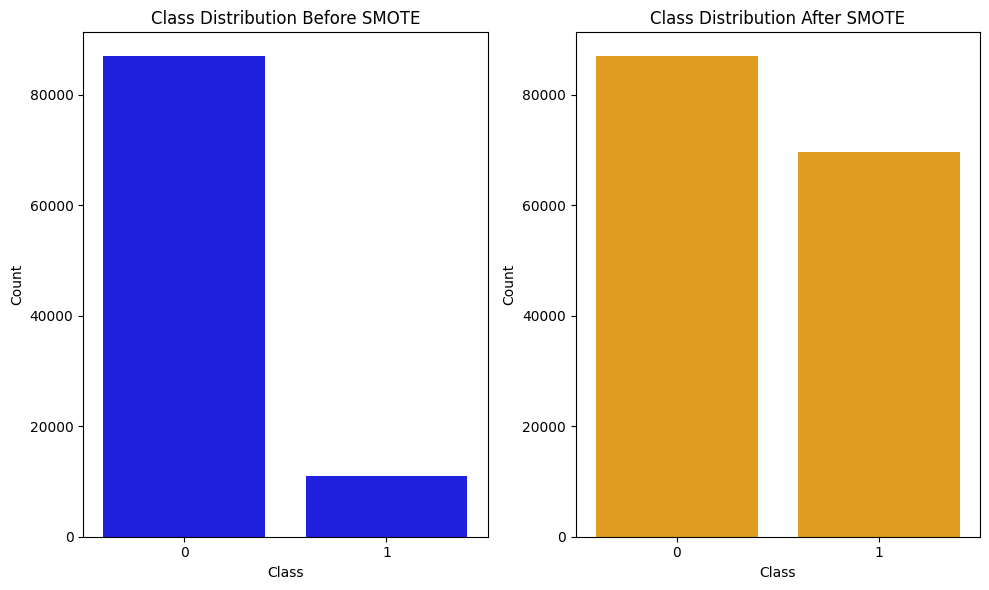

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

original_counts = Counter(y['readmitted'])
new_counts = Counter(y_smote['readmitted'])

# Create a bar plot to visualize the class distribution before and after SMOTE
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()), color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before SMOTE')

# Create a bar plot to visualize the class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.barplot(x=list(new_counts.keys()), y=list(new_counts.values()), color='orange')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()

Running the Neural Network:

Feed Forward Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class DiabetesReadmissionModel(nn.Module):
    def __init__(self, input_dim):
        super(DiabetesReadmissionModel, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.output_layer = nn.Linear(64, 2)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return self.output_layer(x)

def train_model(model, criterion, optimizer, scheduler, X_train, y_train, X_test, y_test, epochs=100, patience=10):
    best_val_loss = float('inf')
    patience_counter = 0
    pred_prob = None

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            # Calculate metrics for training
            train_preds = torch.argmax(outputs, dim=1)
            train_accuracy = accuracy_score(y_train.cpu().numpy(), train_preds.cpu().numpy())
            train_precision = precision_score(y_train.cpu().numpy(), train_preds.cpu().numpy(), average='weighted', zero_division=1)
            train_recall = recall_score(y_train.cpu().numpy(), train_preds.cpu().numpy(), average='weighted', zero_division=1)
            train_f1 = f1_score(y_train.cpu().numpy(), train_preds.cpu().numpy(), average='weighted', zero_division=1)

            # Calculate metrics for validation
            val_outputs = model(X_test)
            val_loss = criterion(val_outputs, y_test)
            val_preds = torch.argmax(val_outputs, dim=1)
            val_accuracy = accuracy_score(y_test.cpu().numpy(), val_preds.cpu().numpy())
            val_precision = precision_score(y_test.cpu().numpy(), val_preds.cpu().numpy(), average='weighted', zero_division=1)
            val_recall = recall_score(y_test.cpu().numpy(), val_preds.cpu().numpy(), average='weighted', zero_division=1)
            val_f1 = f1_score(y_test.cpu().numpy(), val_preds.cpu().numpy(), average='weighted', zero_division=1)

            # Collect predicted probabilities
            tmp_pred_prob = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()

        # Update the best model if validation loss improves
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            pred_prob = tmp_pred_prob  # Update the best prediction probabilities
        else:
            patience_counter += 1

        if patience_counter > patience:
            print("Stopping early due to no improvement in validation loss.")
            break

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
            print(f'Train Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')
            print(f'Val Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}')

    if pred_prob is None:
        pred_prob = tmp_pred_prob  # Ensure we have predictions even if never better than the initial loss

    return pred_prob

# Initialize model, loss, optimizer, and scheduler
input_dim = X_train_tensor.shape[1]
model = DiabetesReadmissionModel(input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.01)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, verbose=False)

# Train the model and get predicted probabilities
pred_prob = train_model(model, criterion, optimizer, scheduler, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=200)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/200, Train Loss: 0.6952, Val Loss: 0.6645
Train Accuracy: 0.5019, Precision: 0.4856, Recall: 0.5019, F1: 0.4856
Val Accuracy: 0.7679, Precision: 0.7958, Recall: 0.7679, F1: 0.7813
Epoch 11/200, Train Loss: 0.6829, Val Loss: 0.6072
Train Accuracy: 0.5612, Precision: 0.5842, Recall: 0.5612, F1: 0.4250
Val Accuracy: 0.8868, Precision: 0.8333, Recall: 0.8868, F1: 0.8373
Epoch 21/200, Train Loss: 0.6762, Val Loss: 0.6026
Train Accuracy: 0.5761, Precision: 0.6103, Recall: 0.5761, F1: 0.4715
Val Accuracy: 0.8741, Precision: 0.8292, Recall: 0.8741, F1: 0.8441
Epoch 31/200, Train Loss: 0.6708, Val Loss: 0.5989
Train Accuracy: 0.5875, Precision: 0.6042, Recall: 0.5875, F1: 0.5156
Val Accuracy: 0.8452, Precision: 0.8251, Recall: 0.8452, F1: 0.8343
Epoch 41/200, Train Loss: 0.6656, Val Loss: 0.5886
Train Accuracy: 0.5923, Precision: 0.6017, Recall: 0.5923, F1: 0.5355
Val Accuracy: 0.8244, Precision: 0.8250, Recall: 0.8244, F1: 0.8247
Epoch 51/200, Train Loss: 0.6620, Val Loss: 0.5857
Train

<ipython-input-98-c47c5954f063>:18: RuntimeWarning: invalid value encountered in divide
  cumulative_gain = tpr / (tpr + fpr)


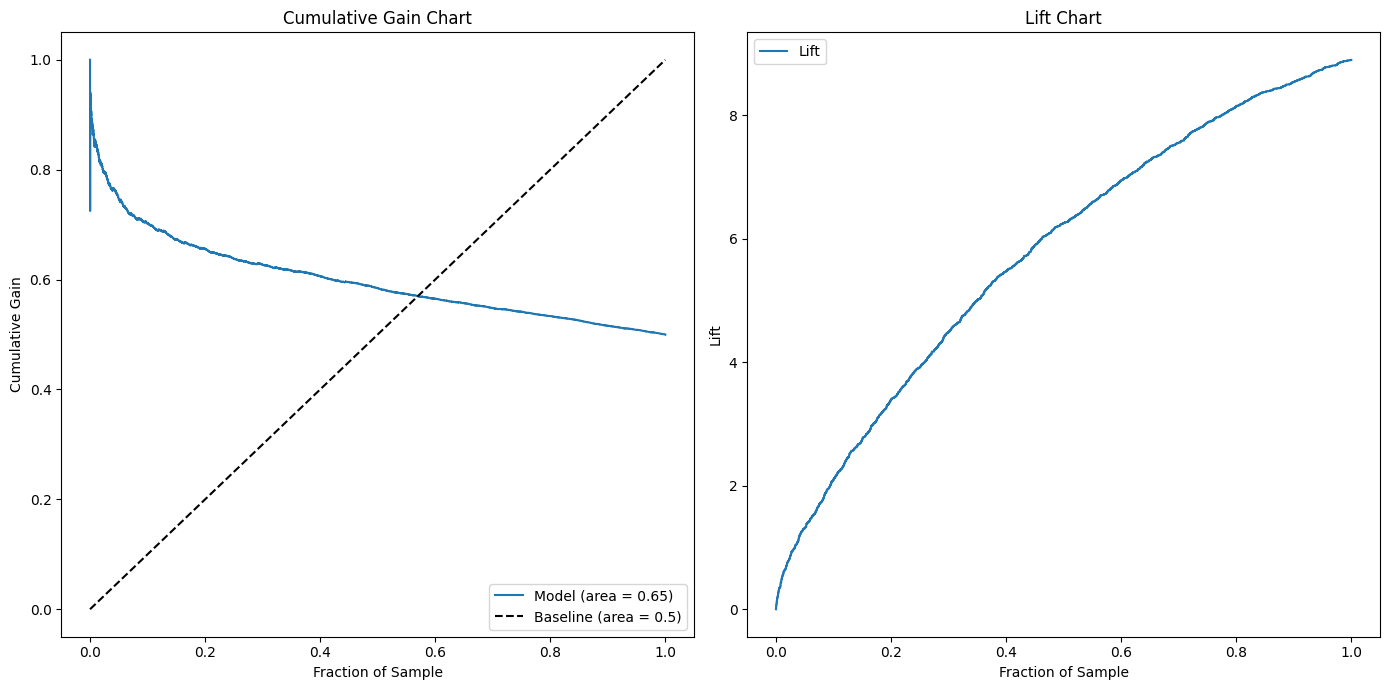

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# y_test_tensor should be the true binary labels for your test set
# predicted_probabilities should be the probability estimates of the positive class
# obtained from the output of your trained model
y_true = y_test_tensor.cpu().numpy()
predicted_prob = pred_prob

# Calculate the points for the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, predicted_prob)

# Calculate the AUC (Area under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Calculate the Cumulative Gain
cumulative_gain = tpr / (tpr + fpr)

# Replace infinite values with the maximum finite value
cumulative_gain[np.isinf(cumulative_gain)] = cumulative_gain[~np.isinf(cumulative_gain)].max()

# Calculate the Lift Curve
lift = tpr / (np.sum(y_true == 1) / len(y_true))

# Replace infinite values with the maximum finite lift value
lift[np.isinf(lift)] = lift[~np.isinf(lift)].max()

# Plotting
plt.figure(figsize=(14, 7))

# Cumulative Gain Chart
plt.subplot(1, 2, 1)
plt.plot(fpr, cumulative_gain, label=f'Model (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (area = 0.5)')
plt.xlabel('Fraction of Sample')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gain Chart')
plt.legend(loc='best')

# Lift Chart
plt.subplot(1, 2, 2)
plt.plot(fpr, lift, label='Lift')
plt.xlabel('Fraction of Sample')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


ResNet Training:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score

# Convert target DataFrames to PyTorch tensors with correct shape
y_train_tensor = torch.tensor(y_train_smote.values.flatten(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values.flatten(), dtype=torch.long)
X_train_tensor = torch.tensor(X_train_smote, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)


class ResidualBlock(nn.Module):
    def __init__(self, input_dim, output_dim, activation=nn.ReLU(), dropout_rate=0.3):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)
        self.bn1 = nn.LayerNorm(output_dim)
        self.activation = activation
        self.fc2 = nn.Linear(output_dim, output_dim)
        self.bn2 = nn.LayerNorm(output_dim)
        self.dropout = nn.Dropout(dropout_rate)

        # Residual connection adjustment layer
        if input_dim != output_dim:
            self.residual_adjust = nn.Linear(input_dim, output_dim)
        else:
            self.residual_adjust = None

    def forward(self, x):
        identity = x
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.activation(out)

        out = self.fc2(out)
        out = self.bn2(out)
        out = self.dropout(out)

        # Add residual (identity) connection
        if self.residual_adjust is not None:
            identity = self.residual_adjust(identity)

        out += identity
        out = self.activation(out)
        return out

class AdvancedResidualNN(nn.Module):
    def __init__(self, input_dim):
        super(AdvancedResidualNN, self).__init__()
        self.layer1 = ResidualBlock(input_dim, 128, dropout_rate=0.3)
        self.layer2 = ResidualBlock(128, 256, dropout_rate=0.4)
        self.layer3 = ResidualBlock(256, 128, dropout_rate=0.5)
        self.final = nn.Linear(128, 3)  # Assuming 3 classes as per your target encoding

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.final(x)
        return x

# Setup for the model, optimizer, and scheduler
model = AdvancedResidualNN(input_dim=X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=0.01)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings
import torch.nn.functional as F

warnings.filterwarnings('ignore', category=UndefinedMetricWarning)  # Ignore undefined metric warnings

def train_model(model, criterion, optimizer, scheduler, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=200):
    best_val_loss = float('inf')
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        # Evaluation phase for both training and validation sets
        model.eval()
        with torch.no_grad():
            # Calculate training metrics
            train_outputs = model(X_train_tensor)
            train_loss = criterion(train_outputs, y_train_tensor)
            train_predictions = torch.argmax(train_outputs, dim=1)
            train_accuracy = accuracy_score(y_train_tensor.cpu().numpy(), train_predictions.cpu().numpy())
            train_precision = precision_score(y_train_tensor.cpu().numpy(), train_predictions.cpu().numpy(), average='weighted', zero_division=1)
            train_recall = recall_score(y_train_tensor.cpu().numpy(), train_predictions.cpu().numpy(), average='weighted', zero_division=1)
            train_f1 = f1_score(y_train_tensor.cpu().numpy(), train_predictions.cpu().numpy(), average='weighted', zero_division=1)

            # Calculate validation metrics
            val_outputs = model(X_test_tensor)
            val_loss = criterion(val_outputs, y_test_tensor)
            val_predictions = torch.argmax(val_outputs, dim=1)
            val_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), val_predictions.cpu().numpy())
            val_precision = precision_score(y_test_tensor.cpu().numpy(), val_predictions.cpu().numpy(), average='weighted', zero_division=1)
            val_recall = recall_score(y_test_tensor.cpu().numpy(), val_predictions.cpu().numpy(), average='weighted', zero_division=1)
            val_f1 = f1_score(y_test_tensor.cpu().numpy(), val_predictions.cpu().numpy(), average='weighted', zero_division=1)

            # Get predicted probabilities for the positive class
            predicted_probabilities = F.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()

            # Calculate AUROC for binary class or multiclass classification
            try:
                val_auroc = roc_auc_score(y_test_tensor.cpu().numpy(), predicted_probabilities)
            except ValueError:
                val_auroc = "Not Computable"

        # Save model if it has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model_state.pth')

        # Adjust the learning rate based on the validation loss
        scheduler.step(val_loss)

        # Print metrics
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f'Epoch {epoch+1}/{epochs}, '
                  f'Train Loss: {train_loss.item()}, Train Accuracy: {train_accuracy}, '
                  f'Train Precision: {train_precision}, Train Recall: {train_recall}, Train F1: {train_f1}, '
                  f'Val Loss: {val_loss.item()}, Val Accuracy: {val_accuracy}, '
                  f'Val Precision: {val_precision}, Val Recall: {val_recall}, Val F1: {val_f1}, Val AUROC: {val_auroc}')

    return predicted_probabilities  # This is returned after the final epoch

# Assuming that model, criterion, optimizer, and scheduler are defined and X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor are properly set.
predicted_probabilities = train_model(model, criterion, optimizer, scheduler, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)


Epoch 1/200, Train Loss: 0.657035768032074, Train Accuracy: 0.6087893837530541, Train Precision: 0.6039767725038175, Train Recall: 0.6087893837530541, Train F1: 0.5983102712575794, Val Loss: 0.6089370846748352, Val Accuracy: 0.713630105553006, Val Precision: 0.8325559461829537, Val Recall: 0.713630105553006, Val F1: 0.7593192046814561, Val AUROC: 0.6373416863660182
Epoch 11/200, Train Loss: 0.6570355296134949, Train Accuracy: 0.6087893837530541, Train Precision: 0.6039767725038175, Train Recall: 0.6087893837530541, Train F1: 0.5983102712575794, Val Loss: 0.6089363098144531, Val Accuracy: 0.713630105553006, Val Precision: 0.8325559461829537, Val Recall: 0.713630105553006, Val F1: 0.7593192046814561, Val AUROC: 0.6373417906689741
Epoch 21/200, Train Loss: 0.657035231590271, Train Accuracy: 0.6087893837530541, Train Precision: 0.6039767725038175, Train Recall: 0.6087893837530541, Train F1: 0.5983102712575794, Val Loss: 0.6089361906051636, Val Accuracy: 0.713630105553006, Val Precision: 0.

<ipython-input-74-06835ef15165>:14: RuntimeWarning: divide by zero encountered in divide
  lift = tpr / fpr
<ipython-input-74-06835ef15165>:14: RuntimeWarning: invalid value encountered in divide
  lift = tpr / fpr


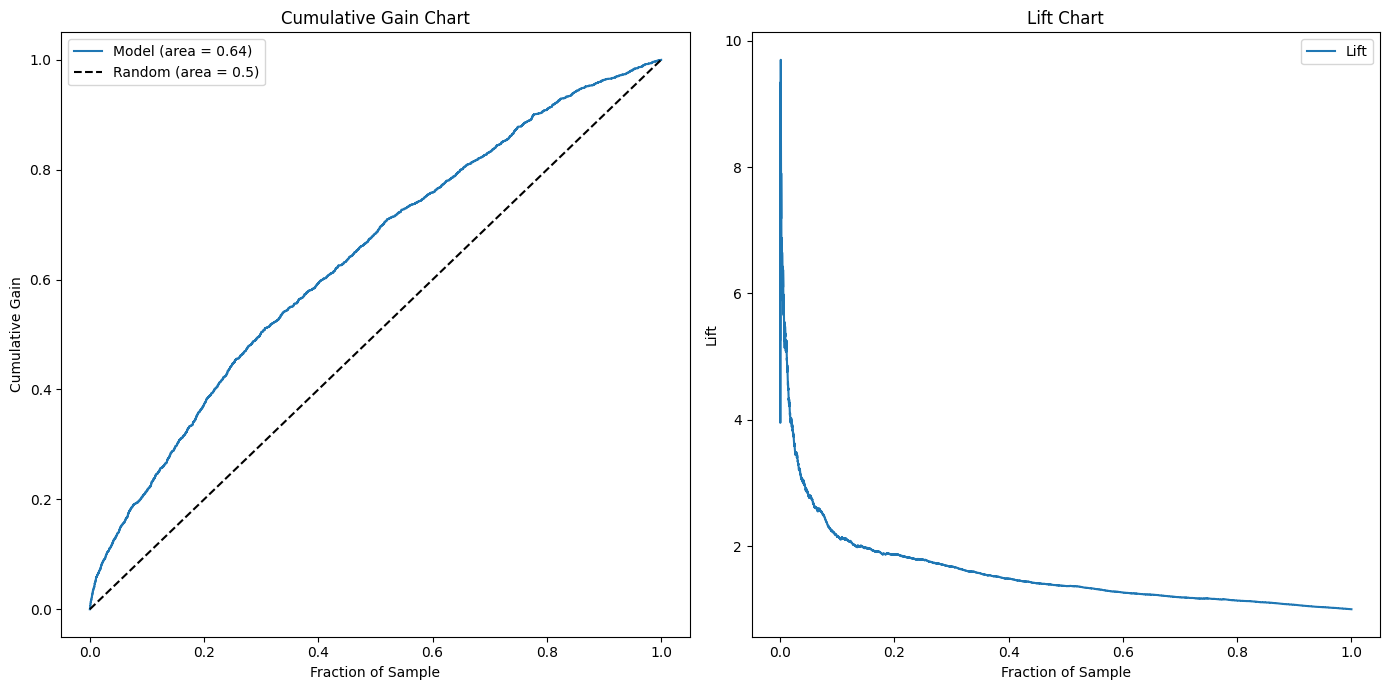

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# You need to have `y_test_tensor` and `predicted_probabilities` ready before this step
# Convert `y_test_tensor` to numpy array if it is a tensor
y_true = y_test_tensor.cpu().numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor

# Calculate the points for the Cumulative Gain Curve
fpr, tpr, thresholds = roc_curve(y_true, predicted_probabilities)
cumulative_gain = auc(fpr, tpr)

# Calculate points for the Lift Curve
lift = tpr / fpr
# Replace infinite values with the maximum finite lift value
lift[np.isinf(lift)] = lift[~np.isinf(lift)].max()

# Plotting
plt.figure(figsize=(14, 7))

# Cumulative Gain Chart
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'Model (area = {cumulative_gain:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random (area = 0.5)')
plt.xlabel('Fraction of Sample')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gain Chart')
plt.legend(loc='best')

# Lift Chart
plt.subplot(1, 2, 2)
plt.plot(fpr, lift, label='Lift')
plt.xlabel('Fraction of Sample')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

warnings.filterwarnings('ignore', category=UndefinedMetricWarning)  # Ignore undefined metric warnings

# Initialize and train logistic regression model
log_reg = LogisticRegression(C=0.1, penalty='l2')
log_reg.fit(X_train_tensor, y_train_tensor)

# Predictions
train_predictions = log_reg.predict(X_train_tensor)
val_predictions = log_reg.predict(X_test_tensor)

# Calculate metrics
train_accuracy = accuracy_score(y_train_tensor.cpu().numpy(), train_predictions)
train_precision = precision_score(y_train_tensor.cpu().numpy(), train_predictions, average='weighted', zero_division=1)
train_recall = recall_score(y_train_tensor.cpu().numpy(), train_predictions, average='weighted', zero_division=1)
train_f1 = f1_score(y_train_tensor.cpu().numpy(), train_predictions, average='weighted', zero_division=1)

val_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), val_predictions)
val_precision = precision_score(y_test_tensor.cpu().numpy(), val_predictions, average='weighted', zero_division=1)
val_recall = recall_score(y_test_tensor.cpu().numpy(), val_predictions, average='weighted', zero_division=1)
val_f1 = f1_score(y_test_tensor.cpu().numpy(), val_predictions, average='weighted', zero_division=1)

# Print metrics
print(f'Train Accuracy: {train_accuracy}, Train Precision: {train_precision}, Train Recall: {train_recall}, Train F1: {train_f1}')
print(f'Val Accuracy: {val_accuracy}, Val Precision: {val_precision}, Val Recall: {val_recall}, Val F1: {val_f1}')


Train Accuracy: 0.6008208109100781, Train Precision: 0.5977265706171696, Train Recall: 0.6008208109100781, Train F1: 0.5759131994981339
Val Accuracy: 0.7569731273265005, Val Precision: 0.8269142407245005, Val Recall: 0.7569731273265005, Val F1: 0.786628358109533


In [ ]:
!pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.0 MB/s eta 0:00:00


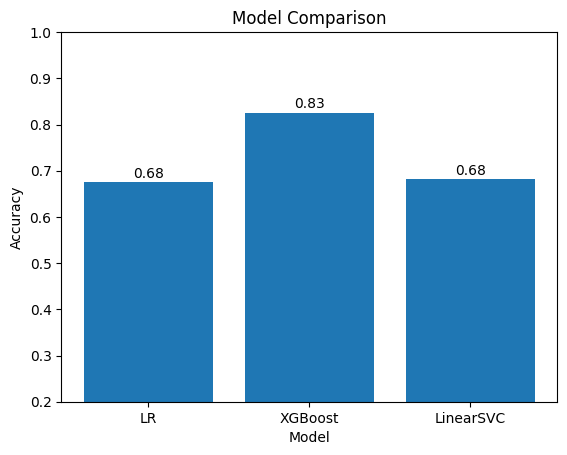

In [ ]:
import matplotlib.pyplot as plt
accuracies = {
    'LR': 0.675,
    'XGBoost': 0.826,
    'LinearSVC': 0.682,
}

plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.2, 1)  # Adjust the range to your accuracies
for i, value in enumerate(accuracies.values()):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')  # Adjust text alignment if necessary
plt.show()
